### Colorectal Dataste

In [1]:
import pandas as pd

In [18]:
import pandas as pd

# Load your dataset (adjust the file path as needed)
data = pd.read_csv("dataset/CRC_data/crc_metadata_PRJEB6070.csv")

# Recode the variables:
# For sex: 0 becomes 'Male', 1 becomes 'Female'
# For disease: 0 becomes 'Case', 1 becomes 'Disease'
data['sex'] = data['sex'].map({0: 'Male', 1: 'Female'})
data['disease'] = data['disease'].map({0: 'Case', 1: 'Disease'})

# Check the recoding by looking at the first few rows and value counts
# print(data.head())
print("Sex distribution:\n", data['sex'].value_counts())
print("Disease distribution:\n", data['disease'].value_counts())


Sex distribution:
 sex
Male      604
Female    446
Name: count, dtype: int64
Disease distribution:
 disease
Disease    586
Case       464
Name: count, dtype: int64


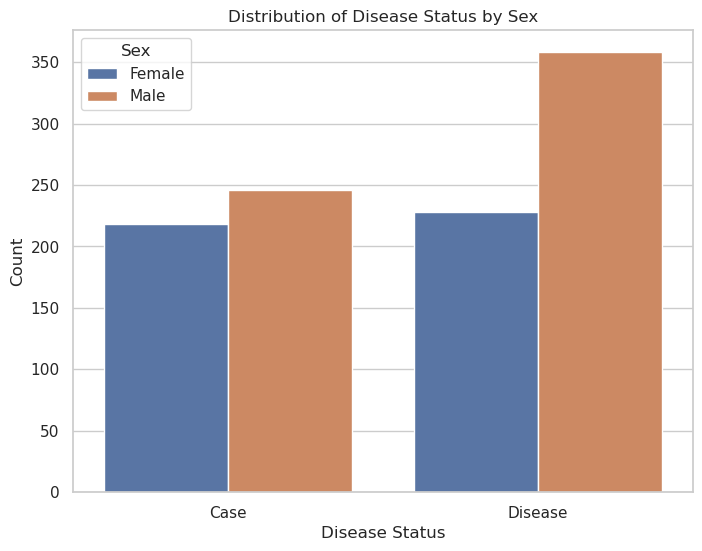

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='disease', hue='sex', data=data)
plt.title('Distribution of Disease Status by Sex')
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


Statistics test to see which columns are the confounder for this study

In [2]:
import pandas as pd
train_metadata = pd.read_csv("dataset/CRC_data/crc_metadata_PRJEB6070.csv")

In [7]:
import pandas as pd

# Split the data based on disease values
group1 = train_metadata[train_metadata['disease'] == 1]
group2 = train_metadata[train_metadata['disease'] == 0]

In [9]:
import scipy.stats as stats

# T-test for host_age (using Welch's t-test if variances are unequal)
t_stat_age, p_val_age = stats.ttest_ind(group1['host_age'], group2['host_age'], equal_var=False)
print(f"host_age t-test: t-statistic = {t_stat_age:.6f}, p-value = {p_val_age:.6f}")

# T-test for bmi (again, using Welch's t-test if needed)
t_stat_bmi, p_val_bmi = stats.ttest_ind(group1['BMI'], group2['BMI'], equal_var=False)
print(f"BMI t-test: t-statistic = {t_stat_bmi:.6f}, p-value = {p_val_bmi:.6f}")

# Optionally compute the F-statistic (F = t^2)
f_stat_age = t_stat_age**2
f_stat_bmi = t_stat_bmi**2
print(f"host_age F-statistic = {f_stat_age:.6f}")
print(f"BMI F-statistic = {f_stat_bmi:.6f}")


host_age t-test: t-statistic = 7.113304, p-value = 0.000000
BMI t-test: t-statistic = 7.580757, p-value = 0.000000
host_age F-statistic = 50.599094
BMI F-statistic = 57.467875


In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table for disease vs. sex
contingency_table = pd.crosstab(train_metadata['disease'], train_metadata['sex'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p_val_sex, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for sex: chi2 = {chi2:.3f}, p-value = {p_val_sex:.3f}")


Contingency Table:
sex        0    1
disease          
0        246  218
1        358  228
Chi-square test for sex: chi2 = 6.584, p-value = 0.010


In [13]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from skbio import DistanceMatrix
from skbio.stats.distance import permanova

# Create a data matrix from host_age and bmi
data = train_metadata[['host_age', 'BMI']].values

# Compute a distance matrix (Euclidean distance)
distances = squareform(pdist(data, metric='euclidean'))

# Create a DistanceMatrix object; using the DataFrame index for identifiers
dm = DistanceMatrix(distances, ids=train_metadata.index.astype(str))

# Use the 'disease' column to form groups
groups = train_metadata['disease'].values

# Run PERMANOVA with 999 permutations
result = permanova(dm, groups, permutations=999)
print(result)


method name               PERMANOVA
test statistic name        pseudo-F
sample size                    1050
number of groups                  2
test statistic            51.708493
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


CRC test

In [11]:
import pandas as pd
test_metadata = pd.read_csv("dataset/CRC_data/crc_metadata_PRJEB27928.csv")

In [12]:
import pandas as pd
train_metadata = pd.read_csv("dataset/CRC_data/crc_metadata_PRJEB6070.csv")

In [13]:
train_metadata[train_metadata['disease']==0]['sex'].value_counts()

sex
0    246
1    218
Name: count, dtype: int64

In [14]:
train_metadata[train_metadata['disease']==1]['sex'].value_counts()

sex
0    358
1    228
Name: count, dtype: int64

In [9]:
test_metadata[test_metadata['disease']==0]['sex'].value_counts()

sex
0    64
1    56
Name: count, dtype: int64

In [10]:
test_metadata[test_metadata['disease']==1]['sex'].value_counts()

sex
0    88
1    52
Name: count, dtype: int64